[View in Colaboratory](https://colab.research.google.com/github/rajagopalmotivate/assignment-2B/blob/master/ReLU_2FC_2Classes.ipynb)

In [5]:
!wget "https://github.com/rajagopalmotivate/assignment-2B/raw/master/data_2class.pkl"


Redirecting output to ‘wget-log.2’.


train
test


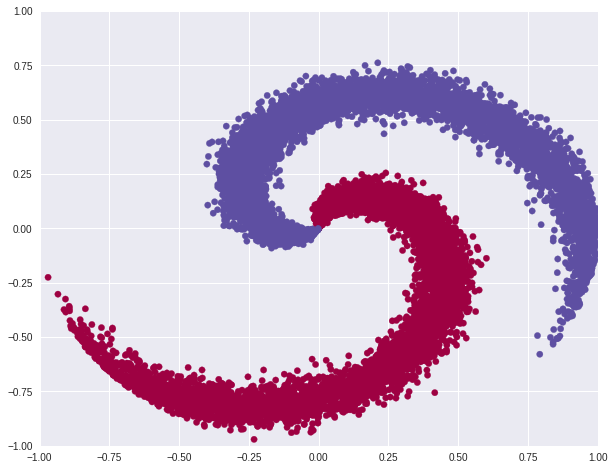

In [6]:
# cross entropy softmax, ReLu

import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# WORKS WELL , two FC layer 

#----
#from datain import *

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(0)
N = 11250 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes


with open('data_2class.pkl', 'rb') as f:
    mydictionary =  pickle.load(f)

for akeyname in mydictionary:
    print (akeyname )

testX, testY = mydictionary["test"]
trainX, trainY = mydictionary["train"]

X = trainX
y = trainY

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()


In [7]:

# initialize parameters randomly
noofneuronsinLayer1 = 100 # size of hidden layer 1
noofneuronsinLayer2 = 50 # size of hidden layer 2

W = 0.01 * np.random.randn(D,noofneuronsinLayer1)
b = np.zeros((1,noofneuronsinLayer1))

W1 = 0.01 * np.random.randn(noofneuronsinLayer1, noofneuronsinLayer2)
b1 = np.zeros((1,noofneuronsinLayer2))

W2 = 0.01 * np.random.randn(noofneuronsinLayer2,K)
b2 = np.zeros((1,K))


# some hyperparameters
step_size = 1e0
reg = 1e-5 # regularization strength

num_examples = X.shape[0]
print('num_examples is = ' + str(num_examples))



for i in range(16000):

    # evaluate class scores, [N x K]
    hidden_layer1 = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
    hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W1) + b1)  # note, ReLU activation
    scores = np.dot(hidden_layer2, W2) + b2

    scoresNEW = np.dot(hidden_layer1, W1) + b1


    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [N x K]

    exp_scoresNEW = np.exp(scoresNEW)
    probsNEW = exp_scoresNEW / np.sum( exp_scoresNEW, axis=1, keepdims=True )

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss

    if i==1:
       # print('hidden_layer = ')
       # print(hidden_layer1)
        print('iteration ,     loss')
    if i % 100 == 0:
        print(loss)

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    dscoresNEW = probsNEW
    dscoresNEW[range(num_examples), y ] -= 1
    dscoresNEW /= num_examples

    if i == 0:
        print('hidden_layer1 shape ' + str(hidden_layer1.shape ))
        print('scores ' + str(scores.shape))
        #print('corect_logprobs = ' + str(corect_logprobs))
        print('loss = ' + str(loss))
        print('probs ' + str(probs.shape))
        print('dscores ' + str(dscores.shape))
        print('probsNEW ' + str(probsNEW.shape))
        print('dscoresNEW ' + str(dscoresNEW.shape))

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer2.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)



    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden2[hidden_layer2 <= 0] = 0

    dW1 = np.dot(hidden_layer1.T, dscoresNEW)
    db1 = np.sum(dscoresNEW, axis=0, keepdims=True)

    dhidden1 = np.dot(dscoresNEW, W1.T)
    # backprop the ReLU non-linearity
    dhidden1[hidden_layer1 <= 0] = 0

    # finally into W,b
    dW = np.dot(X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW1 += reg * W1
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W1 += -step_size * dW1
    b1 += -step_size * db1
    W2 += -step_size * dW2
    b2 += -step_size * db2


num_examples is = 15000
0.6931477405455301
hidden_layer1 shape (15000, 100)
scores (15000, 2)
loss = 0.6931477405455301
probs (15000, 2)
dscores (15000, 2)
probsNEW (15000, 50)
dscoresNEW (15000, 50)
iteration ,     loss
15.667009868378349
3.268990707878521
2.5259957122268886
2.2816567143911652
1.454829058210667
0.4054471038767289
0.16222197167761984
0.08189188384925833
0.051554255492764545
0.041711848002280234
0.035190460133176005
0.030876507853617244
0.027679457121445115
0.02498558342468305
0.022575917387188275
0.02044110770194896
0.018631005385125902
0.017086974917669518
0.015788674794428078
0.014709120760159969
0.013797313821234426
0.01297502307513184
0.012220305155605122
0.011547900626370676
0.010980343332531745
0.010477495537576455
0.01004651271206881
0.009714063257453914
0.009440482074593904
0.009201568704860566
0.008988890382406486
0.008798338173928116
0.008637631050515938
0.00847856806771782
0.008333826677917494
0.008202721987210204
0.008077182575317204
0.007961190085099996
0.

In [8]:

# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W1) + b1)  # note, ReLU activation
scores = np.dot(hidden_layer2, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('Training accuracy = ')
print ((np.mean(predicted_class == y)))

Training accuracy = 
0.9998


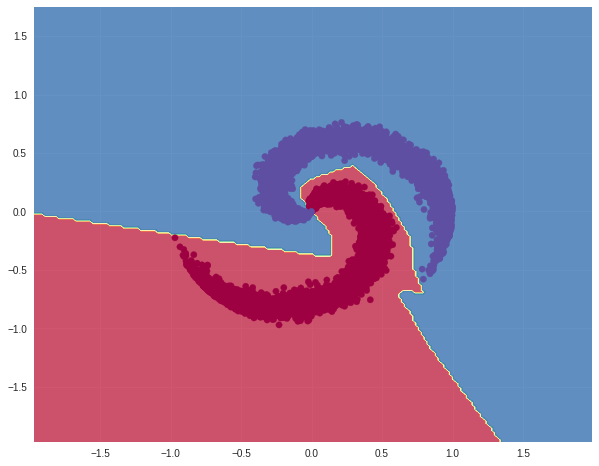

In [9]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

temp1 = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Zbefore = np.dot(np.maximum(0, temp1 ), W1) + b1
Z = np.dot(np.maximum(0, Zbefore ), W2) + b2

Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [0]:
X = testX
y = testY

In [11]:
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W1) + b1)  # note, ReLU activation
scores = np.dot(hidden_layer2, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('Test accuracy = ')
print ((np.mean(predicted_class == y)))

Test accuracy = 
1.0


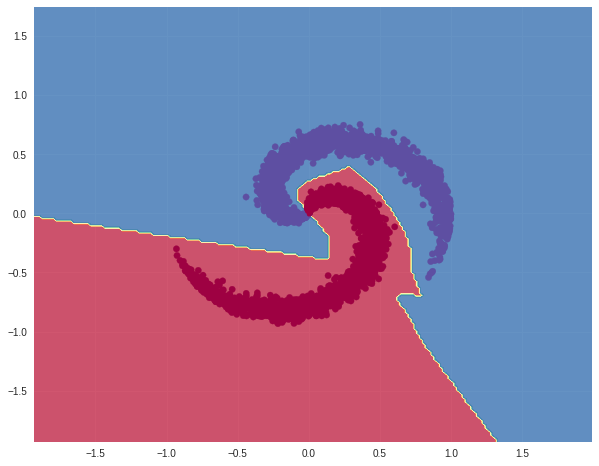

In [12]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

temp1 = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Zbefore = np.dot(np.maximum(0, temp1 ), W1) + b1
Z = np.dot(np.maximum(0, Zbefore ), W2) + b2

Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()